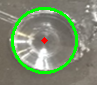

In [12]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read image.
img = cv2.imread('Sample 1.png', cv2.IMREAD_COLOR)

# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred,
				cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
			param2 = 30, minRadius = 1, maxRadius = 40)

# Draw circles that are detected.
if detected_circles is not None:

	# Convert the circle parameters a, b and r to integers.
	detected_circles = np.uint16(np.around(detected_circles))

	for pt in detected_circles[0, :]:
		a, b, r = pt[0], pt[1], pt[2]

		# Draw the circumference of the circle.
		cv2.circle(img, (a, b), r, (0, 255, 0), 2)

		# Draw a small circle (of radius 1) to show the center.
		cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
		cv2_imshow(img)
		cv2.waitKey(0)


Number of contours = 39
[[[85 77]]

 [[85 78]]

 [[84 79]]

 [[83 80]]

 [[82 80]]

 [[81 81]]

 [[80 81]]

 [[79 81]]

 [[78 81]]

 [[77 82]]

 [[76 83]]

 [[75 83]]

 [[74 83]]

 [[73 83]]

 [[72 83]]

 [[71 84]]

 [[72 84]]

 [[73 84]]

 [[74 83]]

 [[75 84]]

 [[76 84]]

 [[77 84]]

 [[78 84]]

 [[79 84]]

 [[80 84]]

 [[81 84]]

 [[82 84]]

 [[83 84]]

 [[84 84]]

 [[85 84]]

 [[86 84]]

 [[87 84]]

 [[87 83]]

 [[88 82]]

 [[89 82]]

 [[90 81]]

 [[89 81]]

 [[88 80]]

 [[87 79]]

 [[86 78]]

 [[86 77]]]


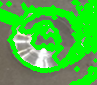

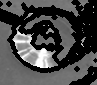

In [33]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('Sample 1.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of contours = " + str(len(contours)))
print(contours[0])

cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2.drawContours(imgray, contours, -1, (0, 255, 0), 3)

cv2_imshow(img)
cv2_imshow(imgray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
import numpy as np
import cv2
  
# Substitute this with your location
image_file = 'Sample 1.png'
# OpenCV reads color images as BGR instead of RGB
rgb_image = cv2.cvtColor(cv2.imread(image_file, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [36]:
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
threshold, thresh_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [37]:
from skimage import morphology
from scipy.ndimage.morphology import binary_fill_holes

# Remove objects containing fewer than 30 pixels (both gives essentially the
# same output)
rmnoise_image = morphology.remove_small_objects(thresh_image.astype(bool), min_size=30)
#rmnoise_image = morphology.binary_opening(thresh_image)

# Fill a gap in the cap of the pen
fillcap_image = morphology.binary_closing(rmnoise_image, selem=morphology.disk(2))

# Fill holes
clean_image = binary_fill_holes(fillcap_image)

In [38]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [39]:
obj_image = np.zeros(clean_image.shape)
for ind, cnt in enumerate(contours):
  col = 255 * (ind + 1) / len(contours) # Different colors, to differentiate objects
  cv2.drawContours(obj_image, [cnt], 0, col, -1)

Object      Area Perimeter Roundness
     0        52     46.38     0.301
     1         2      5.66     0.785
     2        52     36.73     0.489
     3         1      4.00     0.785


ZeroDivisionError: ignored

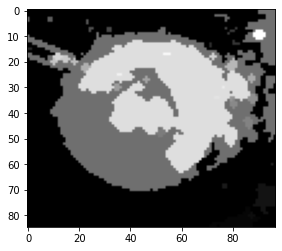

In [44]:
import matplotlib.pyplot as plt
from __future__ import division

round_thresh = 0.9

plt.figure()
height, width = obj_image.shape
plt.imshow(obj_image.astype(np.uint8), cmap='gray')

print('Object      Area Perimeter Roundness')
for ind, contour in enumerate(contours):
  # Compute a simple estimate of the object perimeter
  # contour is a list of N coordinate points (x_i, y_i), and the perimeter is computed as
  # perimeter = sum_{i=0}^{N-2} ( sqrt( (x_{i+1} - x_i)^2 + (y_{i+1} - y_i)^2 ))
  delta_squared = np.diff(contour, axis=0)*np.diff(contour, axis=0)
  perimeter = np.sum(np.sqrt(np.sum(delta_squared, axis=1)))
  
  # or use the built in arcLength() (both arcLength() and contourArea() are
  # based on Freeman chain codes).
  perimeter = cv2.arcLength(contour, True)

  area = cv2.contourArea(contour)
  alpha = 4*np.pi*area/(perimeter**2)
  print('{0:>6} {1:>9,.0f} {2:>9,.2f} {3:>9,.3f}'.format(ind, area, perimeter, alpha))

  # Plot a red circle on the centroid of the round objects
  if alpha > round_thresh:
    moments = cv2.moments(contour)
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    plt.plot(cx, cy, 'ro')

# Fit the plt.plot() figures to the plt.imshow()
axes = plt.gca()
axes.set_xlim([0, width])
axes.set_ylim([height, 0])

plt.show()